Importing necessary Libraries

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importing Data Set

In [408]:
data=pd.read_csv('/content/Coupen.csv')

## Display the initial few rows of the dataset

In [409]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [411]:
data.shape

(12684, 26)

In [412]:
data.size

329784

In [413]:
data.ndim

2

This data consisit of 26 columns and 12684 rows

This consist of 329784 elements

It is a 2 Dimentional Data Set







# **Univariate analysis**

In [414]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [415]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [416]:
col=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']

# **Exploratory Data  Analysis(EDA)**

check for missing values

In [417]:
data.isna().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [418]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Visualizing target variable distribution

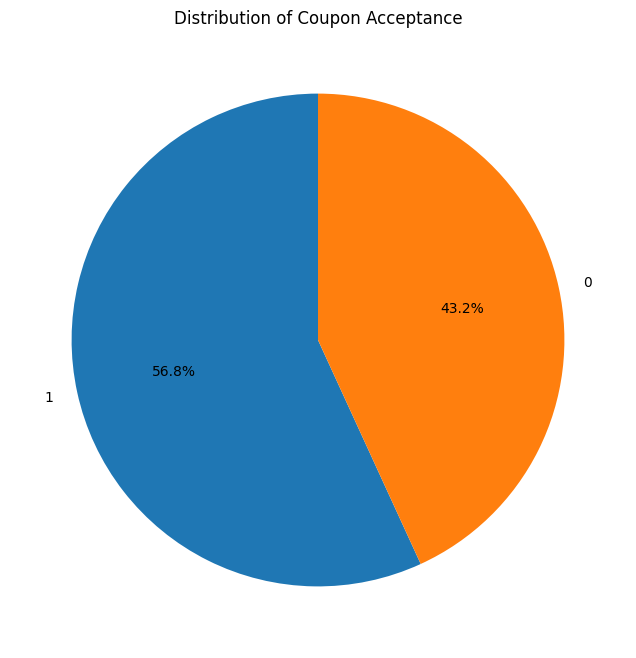

In [419]:

plt.figure(figsize=(8, 8))
data['Y'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Coupon Acceptance')
plt.ylabel('')  # Remove the y-label
plt.show()


# **Data Preprocessing**

missing values handling

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [421]:
data.isna().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Fill the missing values in the categorical columns using **Mode**

In [422]:


# Fill missing values in categorical columns with the mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['maritalStatus'].fillna(data['maritalStatus'].mode()[0], inplace=True)
data['has_children'].fillna(data['has_children'].mode()[0], inplace=True)
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['income'].fillna(data['income'].mode()[0], inplace=True)
data['car'].fillna(data['car'].mode()[0], inplace=True)
data['destination'].fillna(data['destination'].mode()[0], inplace=True)
data['car'].fillna(data['car'].mode()[0], inplace=True)
data['passanger'].fillna(data['passanger'].mode()[0], inplace=True)
data['weather'].fillna(data['weather'].mode()[0], inplace=True)
data['expiration'].fillna(data['expiration'].mode()[0], inplace=True)


data.isna().sum()



destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               153
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

## Fill the missing values in the numerical columns using **Median**

In [423]:
data['temperature'].fillna(data['temperature'].median(), inplace=True)

In [424]:
data.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
car                       0
Bar                     107
CoffeeHouse             217
CarryAway               153
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [425]:

data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)




data.isna().sum()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [426]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# **Outlier Correction**

In [427]:
num_cols = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']

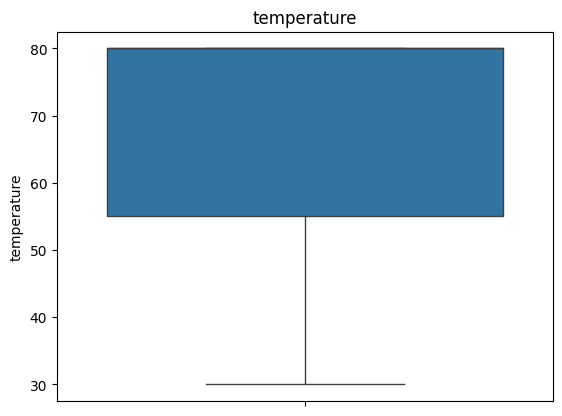

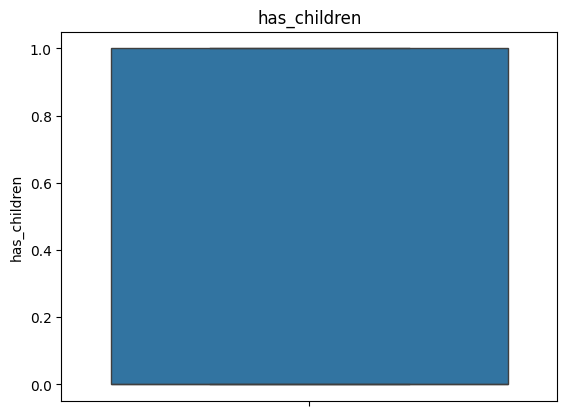

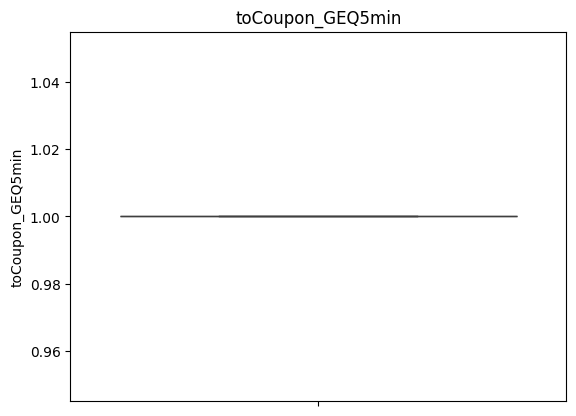

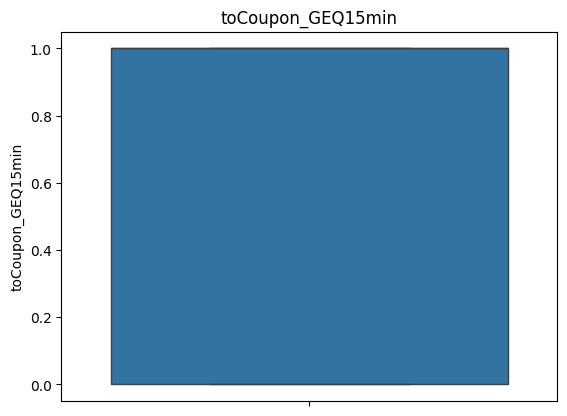

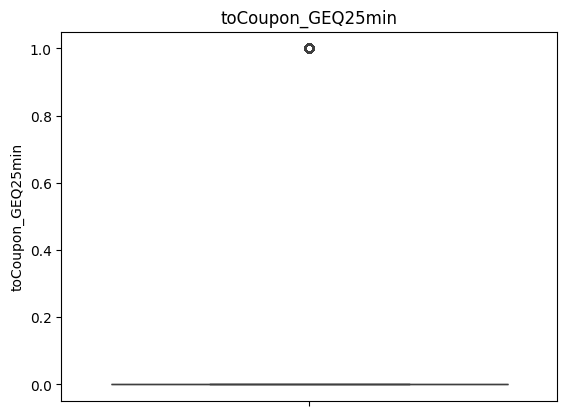

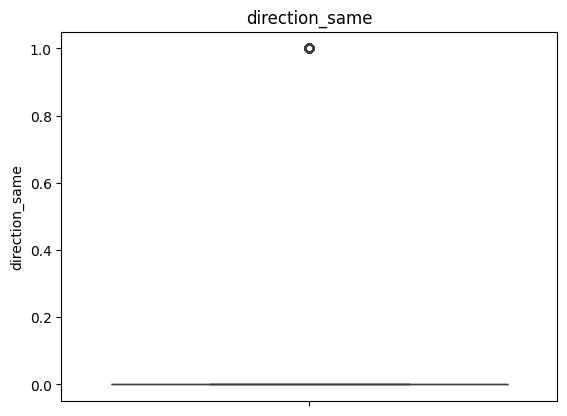

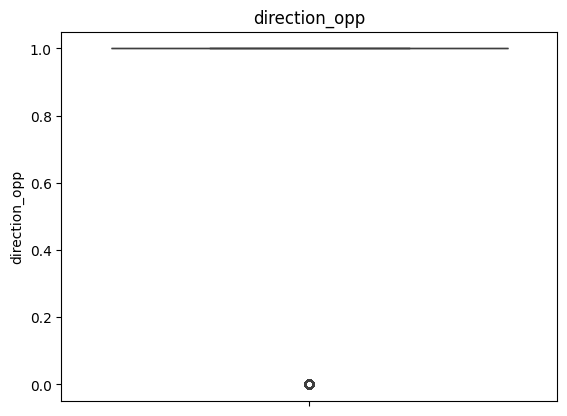

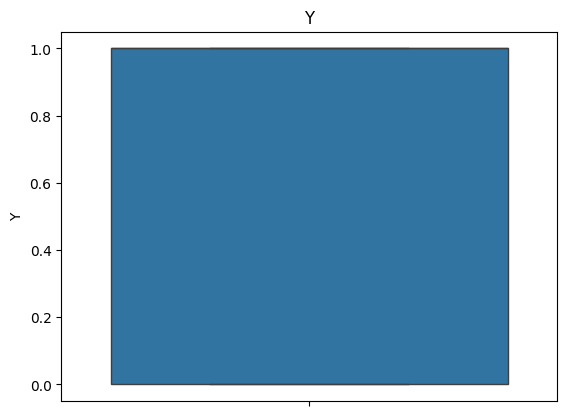

In [428]:
for i in num_cols:
  plt.figure()
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()

 Dictionary to store quartiles and outliers

In [429]:

outlier_dict = {}


In [430]:


for col in num_cols:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q2 = data[col].quantile(0.50)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outlier_values = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
        outlier_dict[col] = {
            'Q1': Q1,
            'Q2': Q2,
            'Q3': Q3,
            'IQR': IQR,
            'lower_limit': lower_limit,
            'upper_limit': upper_limit,
            'outlier_values': outlier_values.tolist()
        }

        data.loc[(data[col] < lower_limit), col] = lower_limit
        data.loc[(data[col] > upper_limit), col] = upper_limit


Print the quartiles and outliers for each column

In [431]:


for col, stats in outlier_dict.items():
    print(f"Column: {col}")
    print(f"  Q1: {stats['Q1']}")
    print(f"  Q2 (Median): {stats['Q2']}")
    print(f"  Q3: {stats['Q3']}")
    print(f"  IQR: {stats['IQR']}")
    print(f"  Lower Limit: {stats['lower_limit']}")
    print(f"  Upper Limit: {stats['upper_limit']}")
    print(f"  Outlier Values: {stats['outlier_values']}")
    print("-" * 20)


Column: temperature
  Q1: 55.0
  Q2 (Median): 80.0
  Q3: 80.0
  IQR: 25.0
  Lower Limit: 17.5
  Upper Limit: 117.5
  Outlier Values: []
--------------------
Column: has_children
  Q1: 0.0
  Q2 (Median): 0.0
  Q3: 1.0
  IQR: 1.0
  Lower Limit: -1.5
  Upper Limit: 2.5
  Outlier Values: []
--------------------
Column: toCoupon_GEQ5min
  Q1: 1.0
  Q2 (Median): 1.0
  Q3: 1.0
  IQR: 0.0
  Lower Limit: 1.0
  Upper Limit: 1.0
  Outlier Values: []
--------------------
Column: toCoupon_GEQ15min
  Q1: 0.0
  Q2 (Median): 1.0
  Q3: 1.0
  IQR: 1.0
  Lower Limit: -1.5
  Upper Limit: 2.5
  Outlier Values: []
--------------------
Column: toCoupon_GEQ25min
  Q1: 0.0
  Q2 (Median): 0.0
  Q3: 0.0
  IQR: 0.0
  Lower Limit: 0.0
  Upper Limit: 0.0
  Outlier Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Using clip function to remove outliers

In [432]:
  data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)

# Print the quartiles and outliers for each column


for col, stats in outlier_dict.items():
    print(f"Column: {col}")
    print(f"  Q1: {stats['Q1']}")
    print(f"  Q2 (Median): {stats['Q2']}")
    print(f"  Q3: {stats['Q3']}")
    print(f"  IQR: {stats['IQR']}")
    print(f"  Lower Limit: {stats['lower_limit']}")
    print(f"  Upper Limit: {stats['upper_limit']}")
    print(f"  Outlier Values: {stats['outlier_values']}")
    print("-" * 20)



Column: temperature
  Q1: 55.0
  Q2 (Median): 80.0
  Q3: 80.0
  IQR: 25.0
  Lower Limit: 17.5
  Upper Limit: 117.5
  Outlier Values: []
--------------------
Column: has_children
  Q1: 0.0
  Q2 (Median): 0.0
  Q3: 1.0
  IQR: 1.0
  Lower Limit: -1.5
  Upper Limit: 2.5
  Outlier Values: []
--------------------
Column: toCoupon_GEQ5min
  Q1: 1.0
  Q2 (Median): 1.0
  Q3: 1.0
  IQR: 0.0
  Lower Limit: 1.0
  Upper Limit: 1.0
  Outlier Values: []
--------------------
Column: toCoupon_GEQ15min
  Q1: 0.0
  Q2 (Median): 1.0
  Q3: 1.0
  IQR: 1.0
  Lower Limit: -1.5
  Upper Limit: 2.5
  Outlier Values: []
--------------------
Column: toCoupon_GEQ25min
  Q1: 0.0
  Q2 (Median): 0.0
  Q3: 0.0
  IQR: 0.0
  Lower Limit: 0.0
  Upper Limit: 0.0
  Outlier Values: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

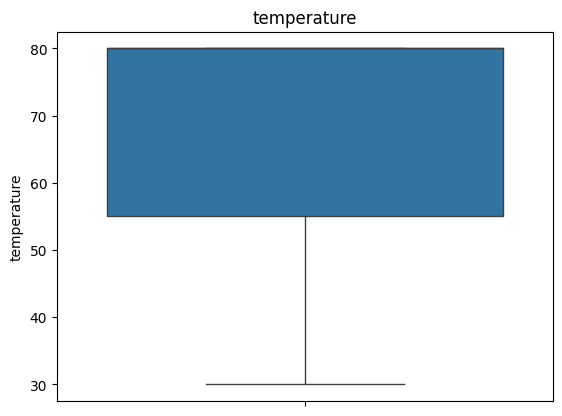

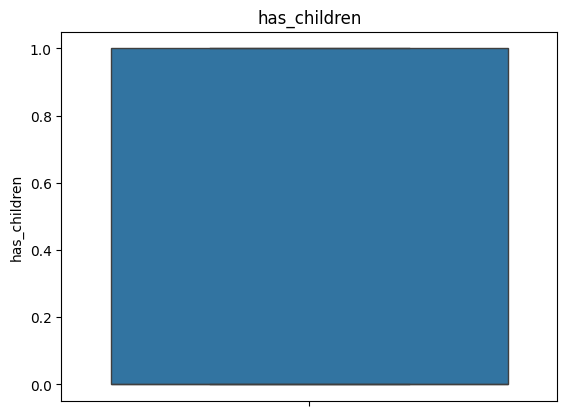

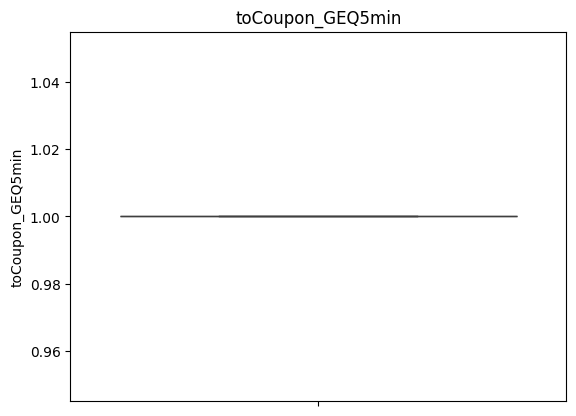

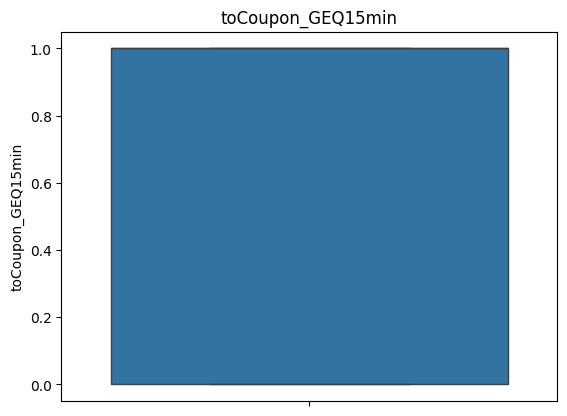

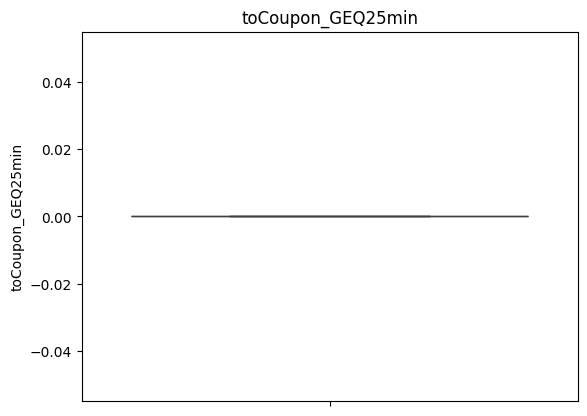

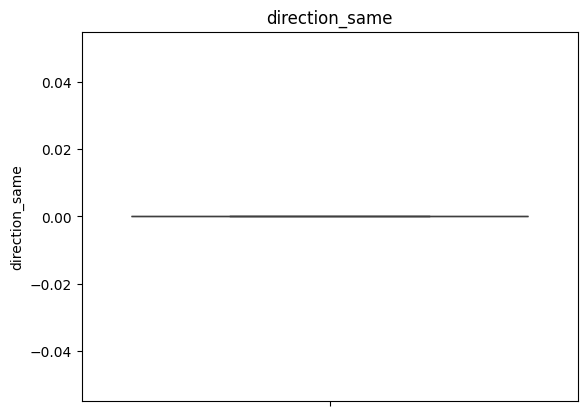

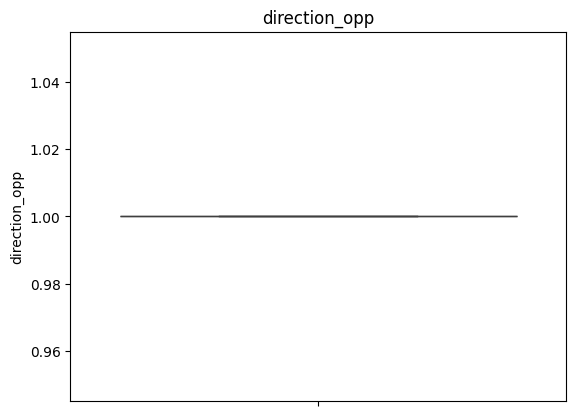

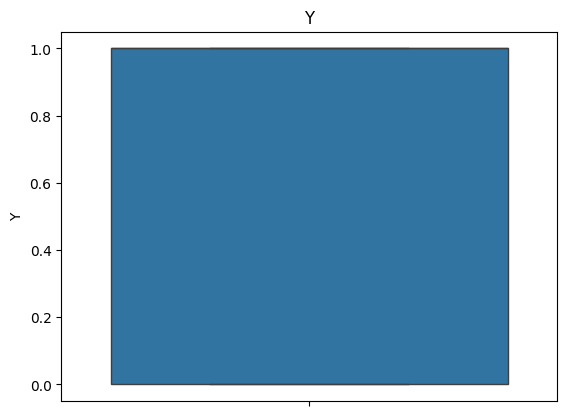

In [433]:
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

# **Encoding**

In [434]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12684 non-null  object 
 1   passanger             12684 non-null  object 
 2   weather               12684 non-null  object 
 3   temperature           12684 non-null  float64
 4   time                  12684 non-null  object 
 5   coupon                12684 non-null  object 
 6   expiration            12684 non-null  object 
 7   gender                12684 non-null  object 
 8   age                   12684 non-null  object 
 9   maritalStatus         12684 non-null  object 
 10  has_children          12684 non-null  float64
 11  education             12684 non-null  object 
 12  occupation            12684 non-null  object 
 13  income                12684 non-null  object 
 14  car                   12684 non-null  object 
 15  Bar                

In [435]:


num_obj_col=['gender','age','maritalStatus','has_children','education','occupation','income','car']


Importing Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ln=LabelEncoder()
for i in num_obj_col:
  data[i]=ln.fit_transform(data[i])

In [ ]:
data.head()

In [ ]:
data.info()

# Feature reduction

In [ ]:

data = data.drop(['direction_same', 'direction_opp'], axis=1)


In [ ]:
data.head()

# **Scaling**

In [ ]:


from sklearn.preprocessing import StandardScaler

numerical_features = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
                      'toCoupon_GEQ25min']
scaler = StandardScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head()


In [ ]:
data.isna().sum()